In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Data Preparation
hrt=pd.read_excel('/content/heart_disease.xlsx',sheet_name='Heart_disease')
hrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
## Exploratory Data Analysis(EDA):
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
hrt.isna().mean()*100

,0
age,0.000000
sex,0.000000
cp,0.000000
trestbps,0.000000
chol,0.000000
fbs,0.000000
restecg,0.000000
thalch,0.000000
exang,0.000000
oldpeak,6.828194


In [6]:
hrt['oldpeak']=hrt['oldpeak'].fillna(hrt['oldpeak'].mean())
hrt.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [7]:
hrt[hrt.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [8]:
hrt[(hrt['age']==58)&(hrt['sex']=='Male')&(hrt['cp']=='non-anginal')&(hrt['trestbps']==150)&(hrt['chol']==219)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [9]:
hrt+hrt.drop_duplicates()
hrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [10]:
hrt.describe()


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


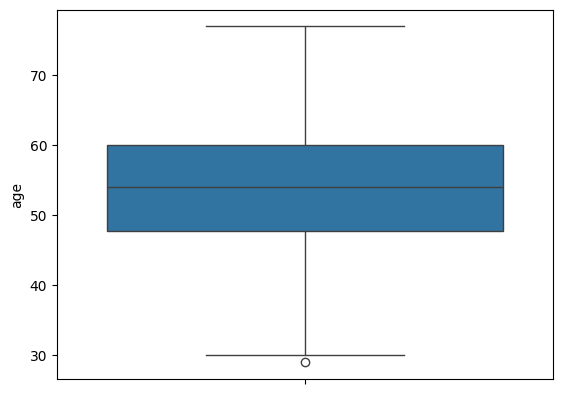

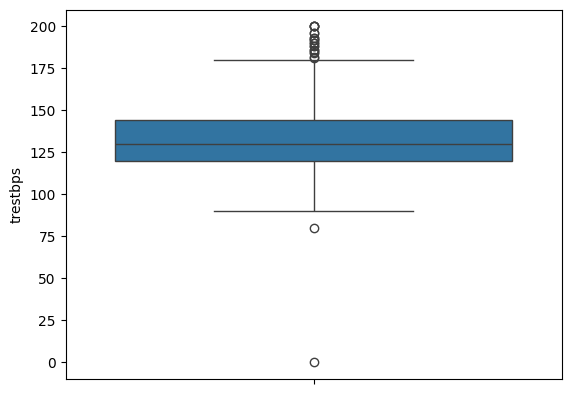

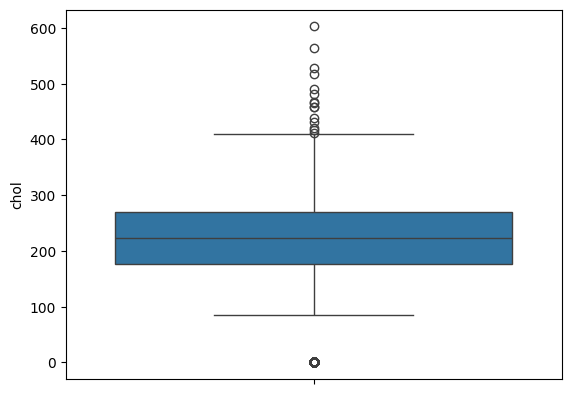

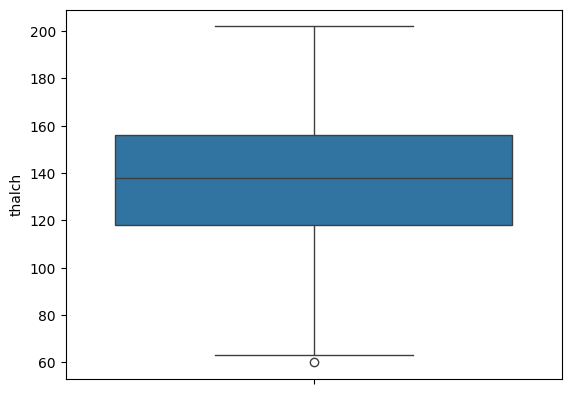

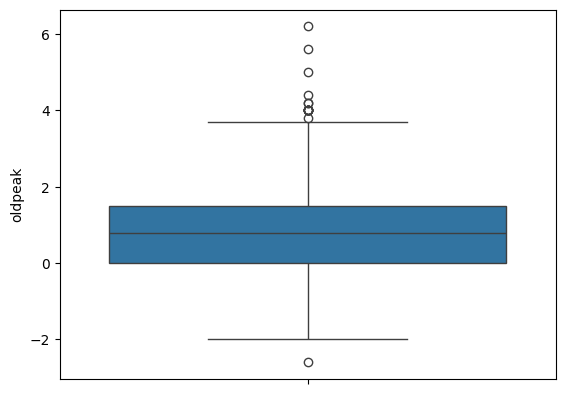

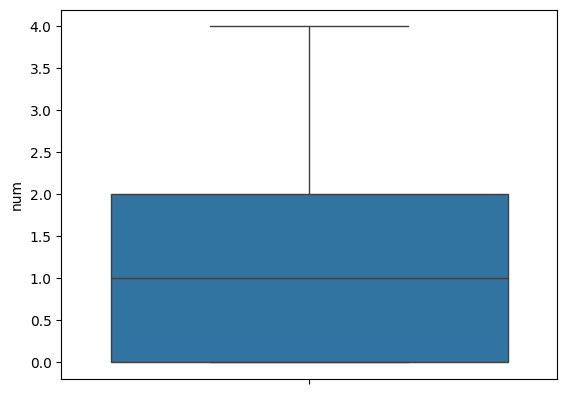

In [11]:
for i in  hrt.describe().columns:
  sns.boxplot(data=hrt[i])
  plt.show()

In [12]:
outlier_columns=['trestbps','chol','thalch','oldpeak']


In [13]:
for i in outlier_columns:
  Q1=hrt[i].quantile(0.25)
  Q3=hrt[i].quantile(0.75)
  IQR=Q3-Q1
  upper_limit=Q3+(1.5*IQR)
  lower_limit=Q1-(1.5*IQR)
  hrt=hrt[~((hrt[i]<lower_limit)|( hrt[i]>upper_limit))]

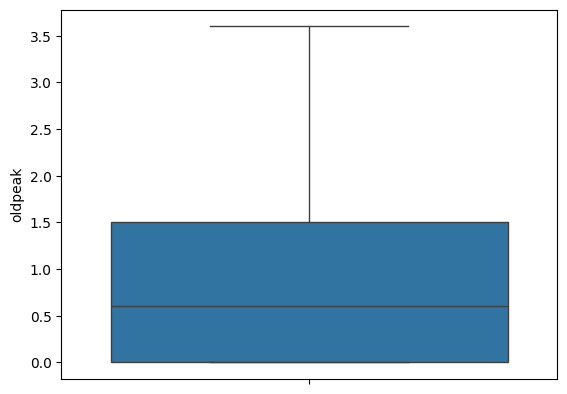

In [14]:
sns.boxplot(data=hrt[i])
plt.show()

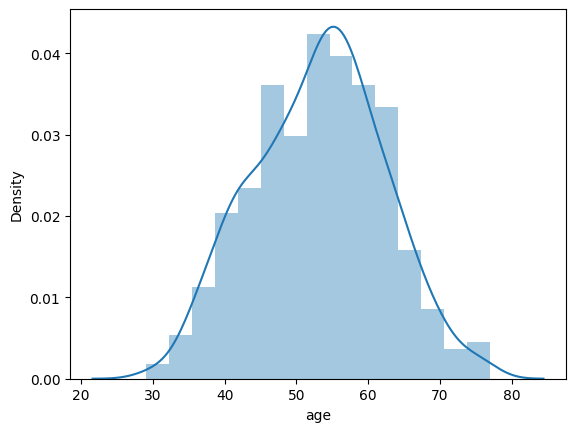

In [15]:
sns.distplot(hrt['age'],kde=True,bins=15,hist=True)
plt.show()

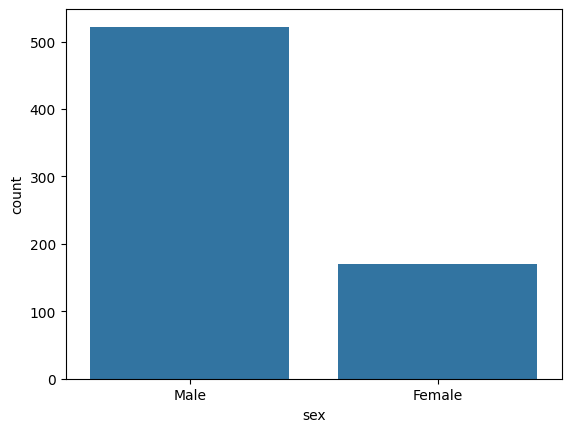

In [16]:
sns.countplot(data=hrt,x='sex')
plt.show()

In [17]:
import plotly.express as px
data=hrt.groupby('sex')['num'].value_counts().reset_index(name='count')
fig=px.bar(data,x='sex',y='count',color='num',barmode='group',template='plotly_dark')
fig.update_layout(title_text='Heart Disease Frequency for Sex',
                  title_x=0.5,
                  xaxis_title='Sex',
                  yaxis_title='Count',
                  legend_title='Heart Disease'
                  )
fig.show()

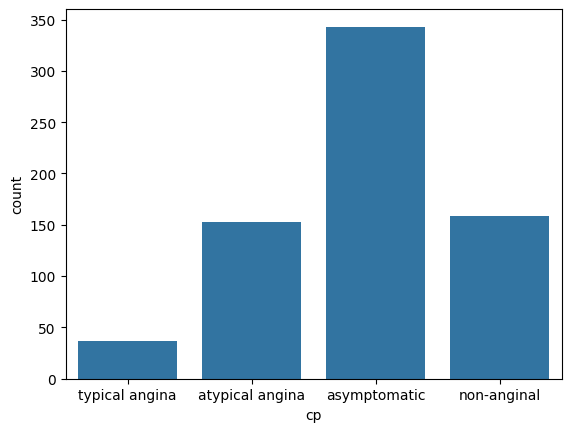

In [19]:
sns.countplot(data=hrt,x='cp')
plt.show()

In [20]:
data=hrt.groupby('cp')['num'].value_counts().reset_index(name='count')
fig=px.bar(data,x='cp',y='count',color='num',barmode='group',template='plotly_dark')
fig.update_layout(title_text='Heart Disease Frequency for Chest Pain Type',
                  title_x=0.5,
                  xaxis_title='Chest Pain Type',
                  yaxis_title='Count',
                  legend_title='Heart Disease'
                  )

In [25]:
fig=px.pie(hrt,names='cp',title='Fasting Bolld Sugar',template='plotly_dark')
fig.update_traces(textposition='inside',textinfo='percent+label',textfont_color='black')
fig.update_layout(title_x=0.5)
fig.show()

In [27]:
fig=px.histogram(hrt,x='trestbps',template='plotly_dark',text_auto=True)
fig.update_traces(marker_line_width=1.5,marker_line_color='white')
fig.update_layout(title_text='Distribution of resting bolld pressure',
                  title_x=0.5)
fig.show()

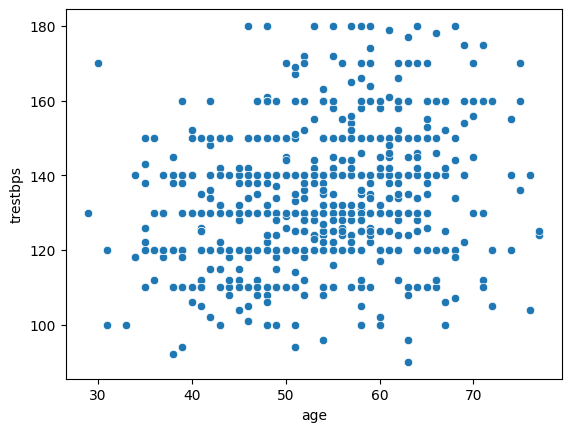

In [28]:
sns.scatterplot(data=hrt,x='age',y='trestbps')
plt.show()

In [30]:
fig = px.histogram(hrt,x='chol',template='plotly_dark',text_auto=True,nbins=25)
fig.update_traces(marker_line_width=1.5, marker_line_color='white')
fig.update_layout(title='Distribution of serum cholesterol',
                  title_x=0.5)
fig.show()

In [32]:
px.scatter(hrt,x='chol',y='age',color='trestbps',template='plotly_dark')

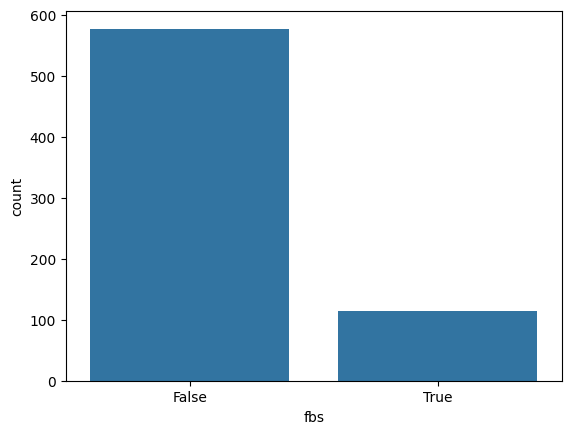

In [33]:
sns.countplot(data=hrt,x='fbs')
plt.show()

In [34]:
data = hrt.groupby('fbs')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='fbs', y='count', color='num', barmode='group',template='plotly_dark')
fig.update_layout(title='Heart Disease Count by Fasting Blood Sugar',
                  title_x=0.5,
                  xaxis_title='Fasting Blood Sugar',
                  yaxis_title='Count',
                  legend_title='Heart Disease')
fig.show()

In [35]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       692 non-null    int64  
 1   sex       692 non-null    object 
 2   cp        692 non-null    object 
 3   trestbps  692 non-null    int64  
 4   chol      692 non-null    int64  
 5   fbs       692 non-null    bool   
 6   restecg   692 non-null    object 
 7   thalch    692 non-null    int64  
 8   exang     692 non-null    object 
 9   oldpeak   692 non-null    float64
 10  slope     692 non-null    object 
 11  thal      692 non-null    object 
 12  num       692 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 71.0+ KB


In [36]:
fig = px.histogram(hrt,x='thalch',nbins=15,template='plotly_dark',text_auto=True)
fig.update_traces(marker_line_width=1.5, marker_line_color='white')
fig.update_layout(title='Distribution of maximum heart rate achieved',
                  title_x=0.5)
fig.show()

In [37]:
px.scatter(hrt,x='thalch',y='age',color='chol',template='plotly_dark')

In [38]:
data = hrt.groupby('exang')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='exang', y='count', color='num',template='plotly_dark',text_auto=True)
fig.update_layout(title='Exercise-Induced Angina',
                  title_x=0.5)
fig.show()

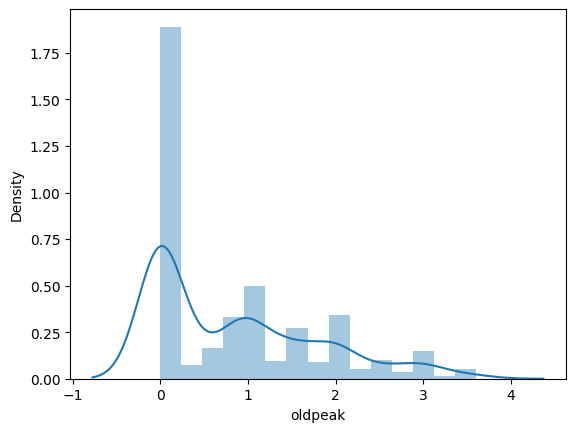

In [39]:
sns.distplot(hrt['oldpeak'],kde=True,bins=15,hist=True)
plt.show()

In [40]:
px.scatter(hrt,x='age',y='chol',color='oldpeak',template='plotly_dark')

In [41]:
data = hrt['slope'].value_counts().reset_index()
fig = px.bar(data, x='slope', y='count',color='slope',template='plotly_dark',text_auto=True)
fig.update_layout(title='Distribution of slope of the peak exercise ST segment',
                  title_x=0.5)
fig.show()

In [42]:
data = hrt.groupby('slope')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='slope', y='count', color='num',barmode='group',template='plotly_dark')
fig.update_layout(title='Heart Disease Count by Slope',
                  title_x=0.5,
                  xaxis_title='Slope',
                  yaxis_title='Count',
                  legend_title='Heart Disease')
fig.show()

In [43]:
data = hrt['thal'].value_counts().reset_index()
fig = px.bar(data, x='thal', y='count',color='thal',template='plotly_dark',text_auto=True)
fig.update_layout(title='Distribution of thalassemia',
                  title_x=0.5)
fig.show()

In [44]:
data = hrt.groupby('thal')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='thal', y='count', color='num',barmode='group',template='plotly_dark')
fig.update_layout(title='Heart Disease Count by Thalassemia',
                  title_x=0.5,
                  xaxis_title='Thalassemia',
                  yaxis_title='Count',
                  legend_title='Heart Disease')
fig.show()

In [45]:
data = hrt['num'].value_counts().reset_index()
fig = px.bar(data, x='num', y='count',color='num',template='plotly_dark',text_auto=True)
fig.update_layout(title='Distribution of target variable',
                  title_x=0.5)
fig.show()

In [46]:
fig = px.pie(hrt,names='num',title='Level of Heart Desaese',template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label',textfont_color='black')
fig.update_layout(title_x=0.5)
fig.show()

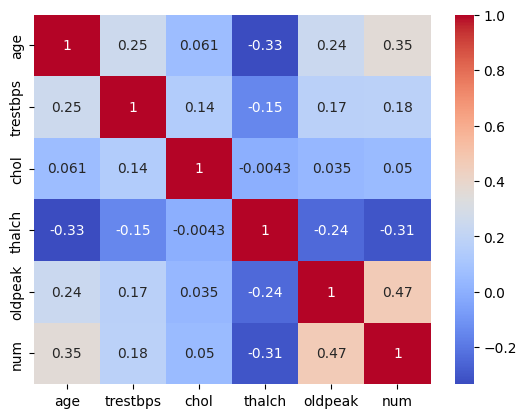

In [47]:
corr=hrt[hrt.describe().columns].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [48]:
#FeatureEngineering
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [50]:
label_encoder=LabelEncoder()
label_encoder

LabelEncoder()

In [51]:
hrt.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [53]:
hrt['sex'] = label_encoder.fit_transform(hrt['sex'])
hrt['cp'] = label_encoder.fit_transform(hrt['cp'])
hrt['fbs'] = label_encoder.fit_transform(hrt['fbs'])
hrt['restecg'] = label_encoder.fit_transform(hrt['restecg'])
hrt['slope'] = label_encoder.fit_transform(hrt['slope'])
hrt['thal'] = label_encoder.fit_transform(hrt['thal'])
hrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,False,2.3,0,0,0
1,41,1,1,135,203,0,1,132,False,0.0,1,0,0
2,57,1,0,140,192,0,1,148,False,0.4,1,0,0
3,52,1,3,118,186,0,0,190,False,0.0,1,0,0
4,57,1,0,110,201,0,1,126,True,1.5,1,0,0


In [54]:
hrt['exang'] = hrt['exang'].astype(bool)
hrt['exang'] = hrt['exang'].astype(int)
hrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


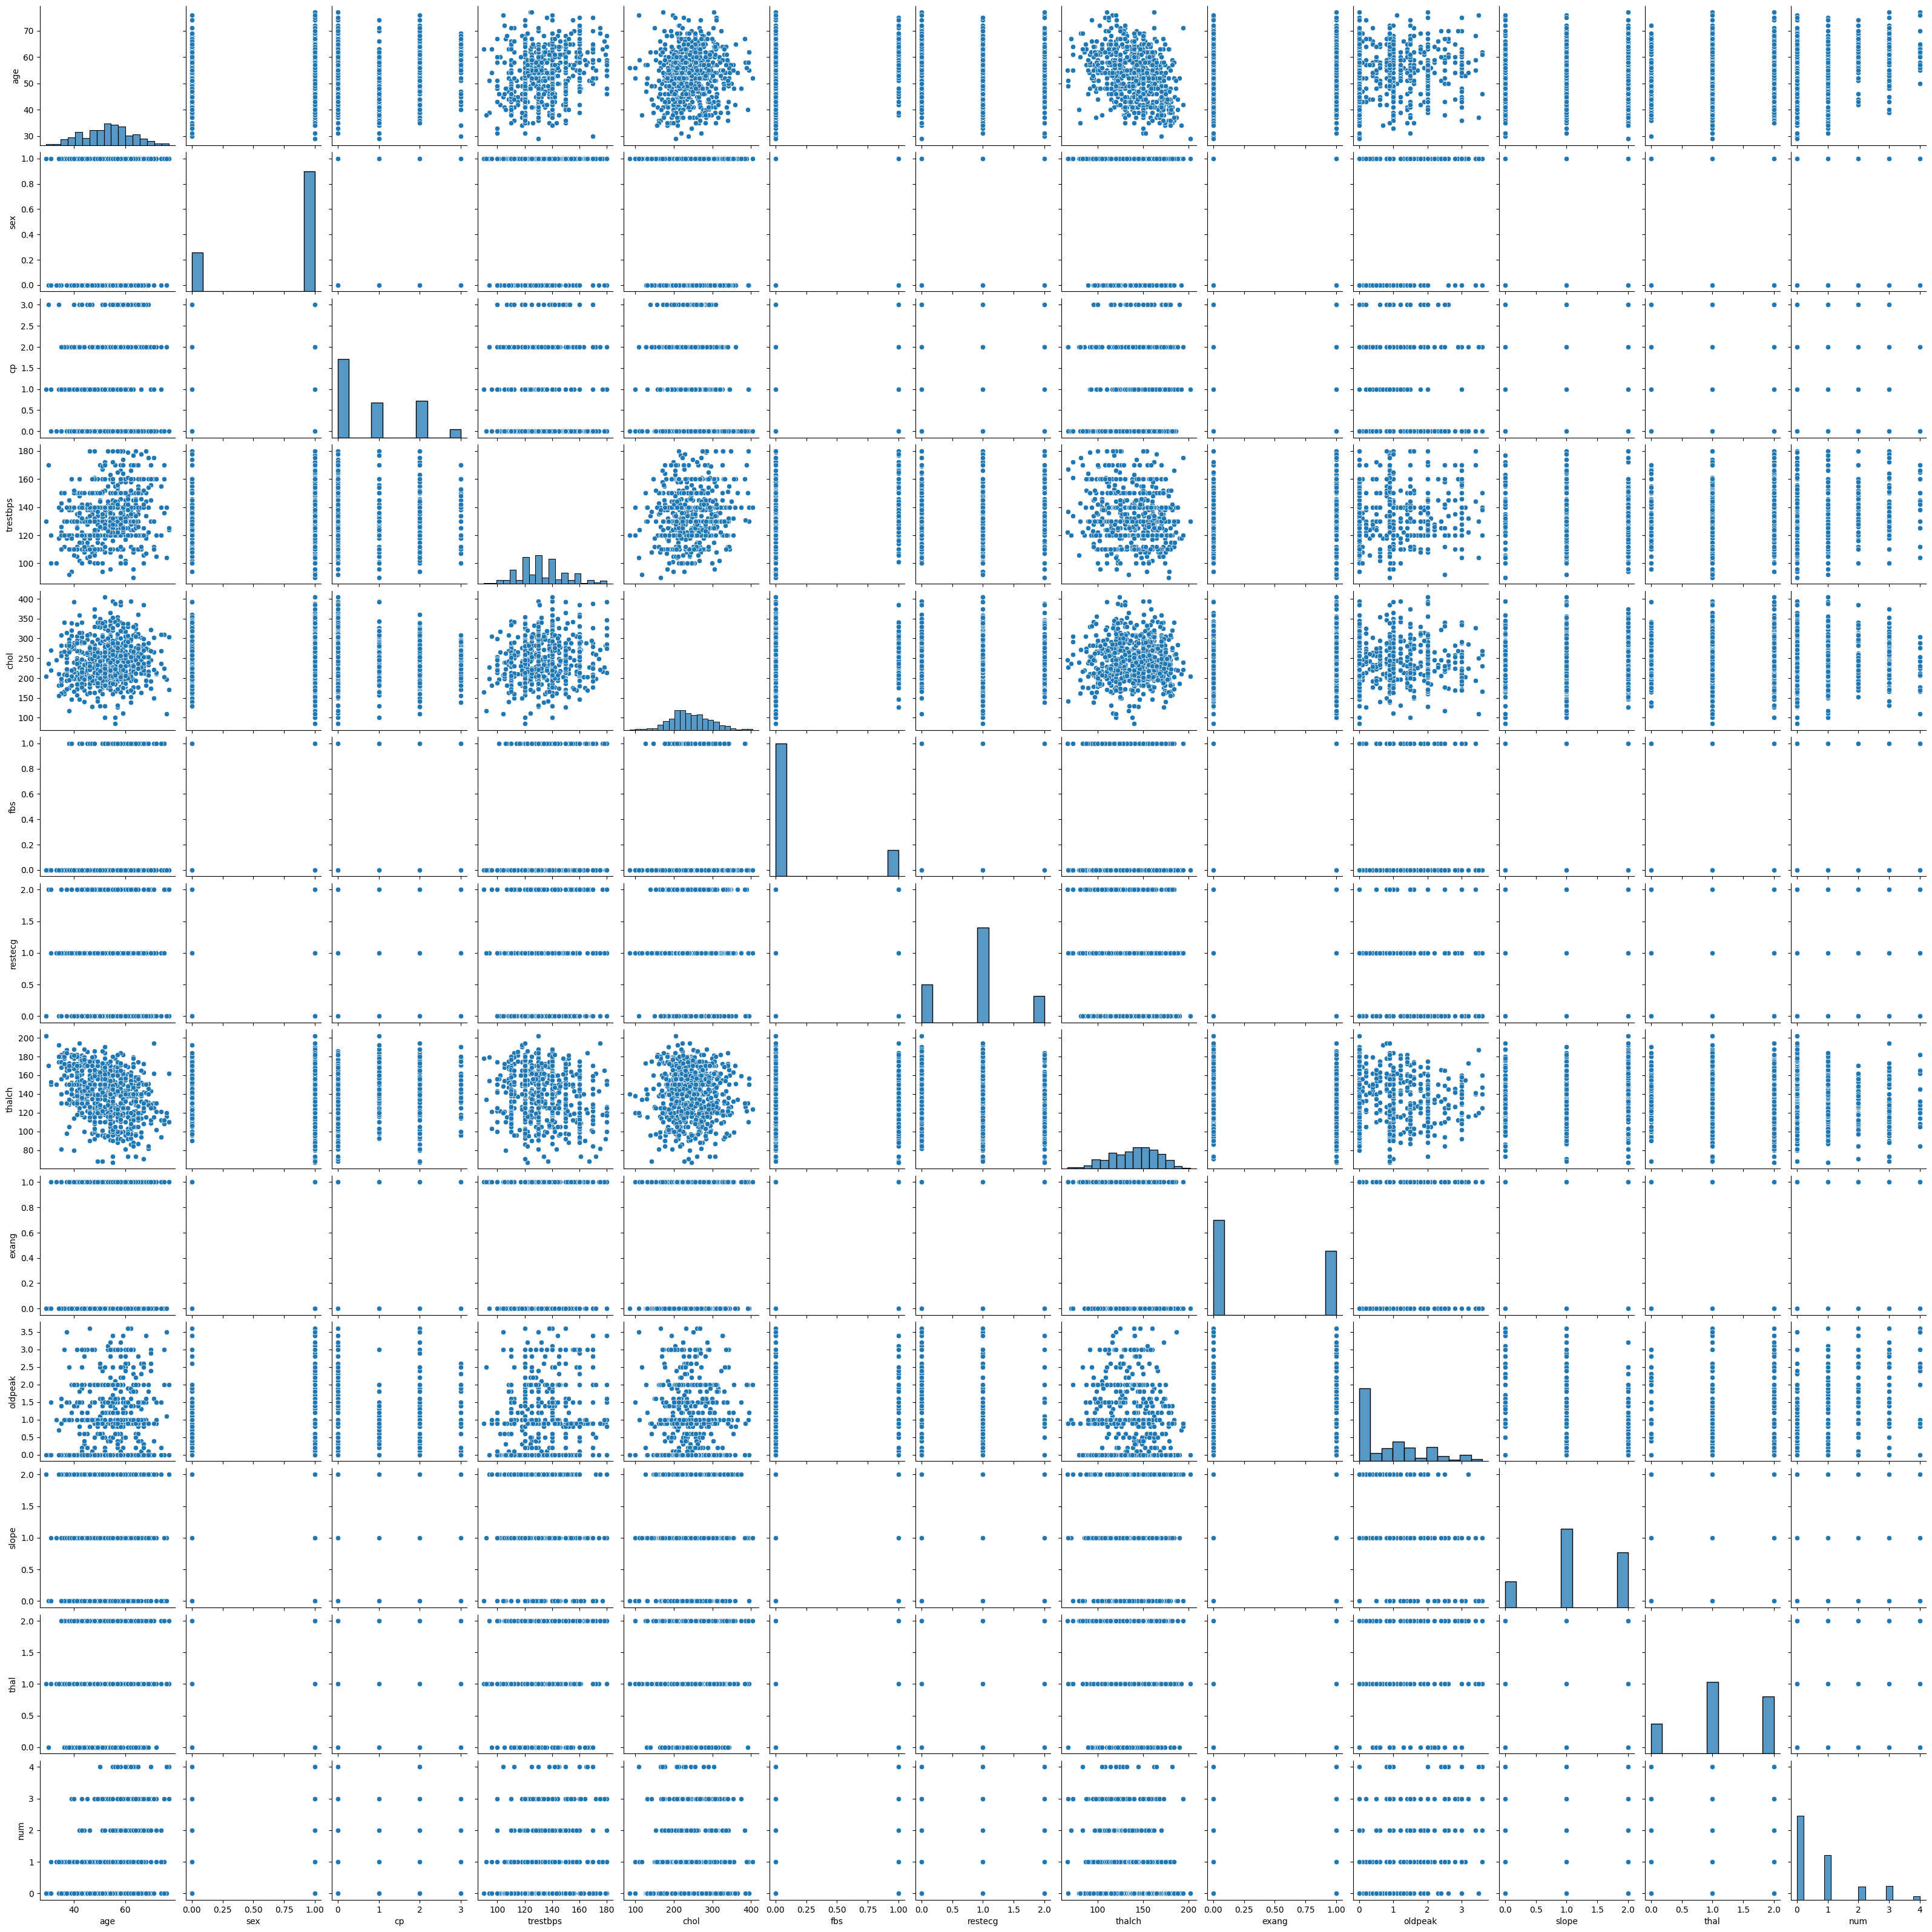

In [55]:
sns.pairplot(hrt)
plt.show()

In [56]:
#DecisionTreeClassification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [58]:
x=hrt.drop('num',axis=1)
y=hrt['num']

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
Decision_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
Decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [62]:
print('Train accuracy',Decision_tree.score(x_train,y_train))
print('Test accuracy',Decision_tree.score(x_test,y_test))

Train accuracy 0.701627486437613
Test accuracy 0.5683453237410072


In [63]:
y_pred=Decision_tree.predict(x_test)
y_pred[:5]

array([1, 1, 0, 0, 0])

In [64]:
print(classification_report(y_test,Decision_tree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        82
           1       0.29      0.33      0.31        30
           2       0.00      0.00      0.00        10
           3       0.22      0.14      0.17        14
           4       0.00      0.00      0.00         3

    accuracy                           0.57       139
   macro avg       0.25      0.26      0.25       139
weighted avg       0.51      0.57      0.54       139



In [65]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[67, 13,  1,  1,  0],
       [16, 10,  0,  4,  0],
       [ 4,  4,  0,  2,  0],
       [ 6,  5,  1,  2,  0],
       [ 0,  3,  0,  0,  0]])

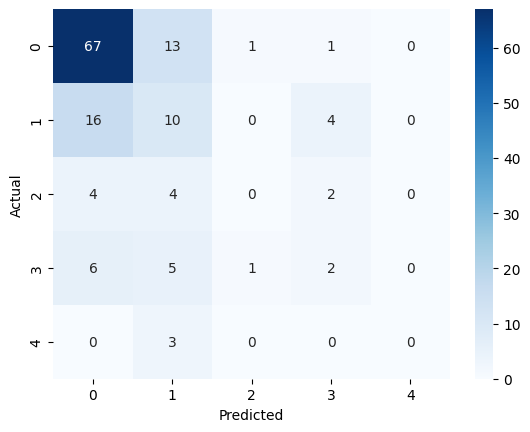

In [66]:
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [72]:
from sklearn.metrics import roc_auc_score

y_pred_proba = Decision_tree.predict_proba(x_test)
print('ROC Score is:', roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

ROC Score is: 0.7451166171801337


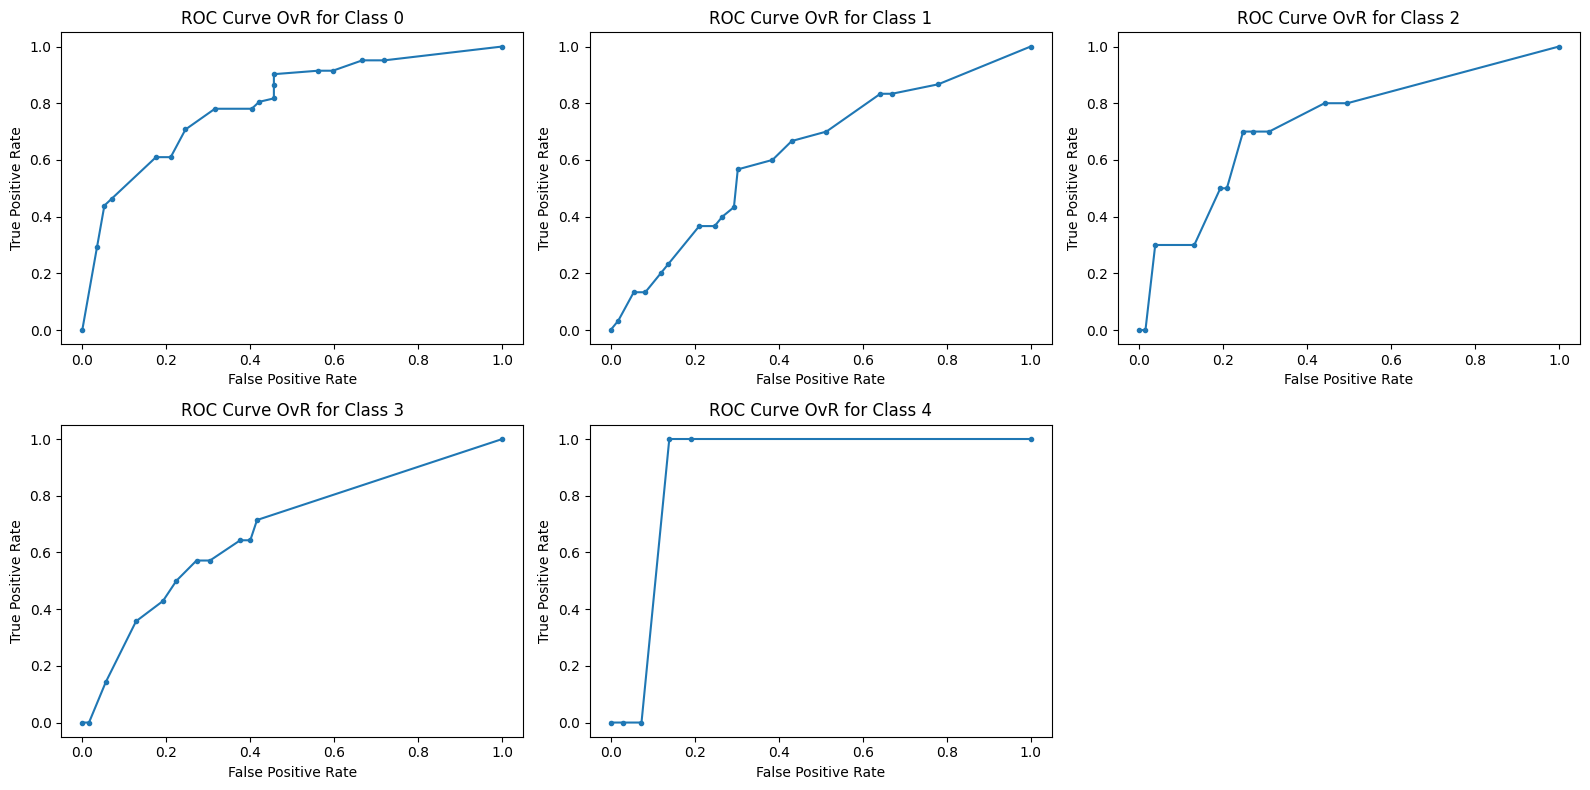

ROC AUC OvR for class 0: 0.80
ROC AUC OvR for class 1: 0.63
ROC AUC OvR for class 2: 0.73
ROC AUC OvR for class 3: 0.68
ROC AUC OvR for class 4: 0.89


In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
classes = Decision_tree.classes_  # Assuming this gives the list of class labels
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliary dataframe to help with the ROC curve
    df_aux = x_test.copy()  # X_test is your test data (features)
    df_aux['class'] = [1 if y == c else 0 for y in y_test]  # y_test is your test data (true labels)
    df_aux['prob'] = y_pred_proba[:, i]  # y_proba is the predicted probabilities from the model

    # Calculates the ROC Coordinates and plots the ROC Curves
    fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
    ax = plt.subplot(2, 3, i+1)
    ax.plot(fpr, tpr, marker='.')
    ax.set_title(f"ROC Curve OvR for Class {c}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.tight_layout()
plt.show()

# Print ROC AUC scores
for c in roc_auc_ovr:
    print(f"ROC AUC OvR for class {c}: {roc_auc_ovr[c]:.2f}")

In [77]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 5,10, 20, 30, 40, 50],  # Maximum depth of the tree
}

In [79]:
dt = DecisionTreeClassifier(random_state=42)

In [81]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30, 40, 50]},
             scoring='accuracy', verbose=1)

In [83]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'criterion': 'entropy', 'max_depth': 5}


In [84]:
#Model Evaluation and Analysis


In [86]:
y_pred = best_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        82
           1       0.29      0.33      0.31        30
           2       0.00      0.00      0.00        10
           3       0.22      0.14      0.17        14
           4       0.00      0.00      0.00         3

    accuracy                           0.57       139
   macro avg       0.25      0.26      0.25       139
weighted avg       0.51      0.57      0.54       139



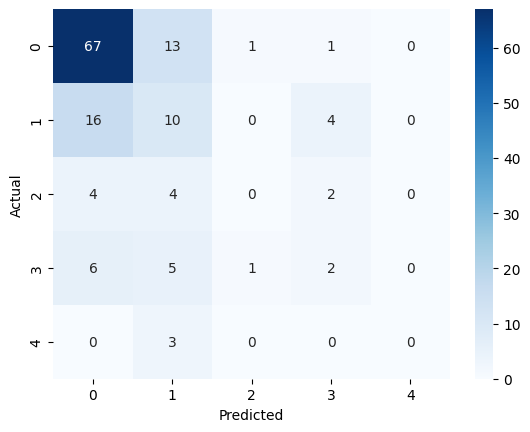

In [87]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [88]:
y_pred_proba = best_model.predict_proba(x_test) # Get predicted probabilities
print('ROC Score is:', roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

ROC Score is: 0.7451166171801337


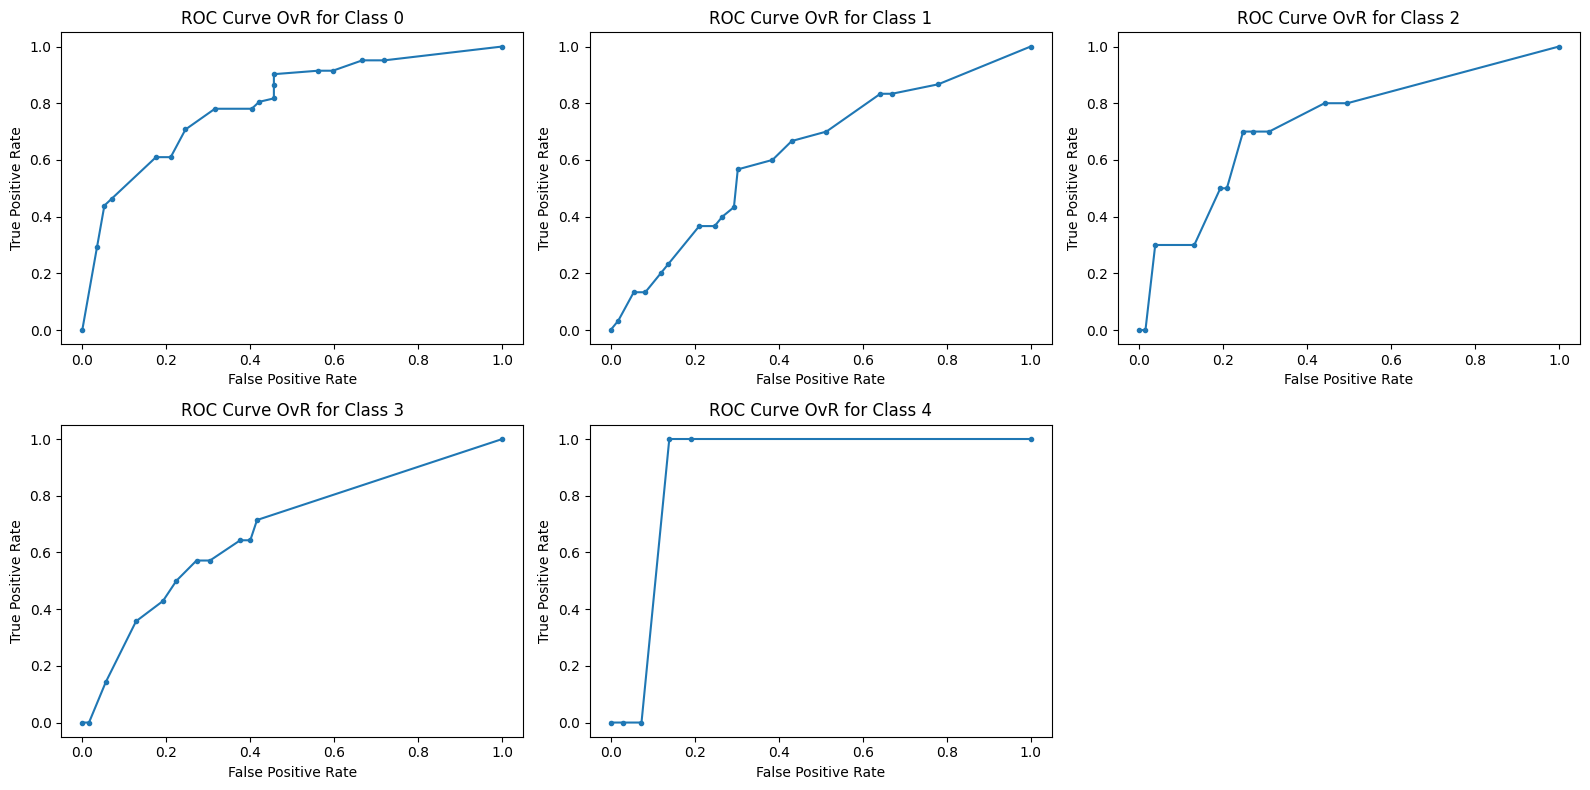

ROC AUC OvR for class 0: 0.80
ROC AUC OvR for class 1: 0.63
ROC AUC OvR for class 2: 0.73
ROC AUC OvR for class 3: 0.68
ROC AUC OvR for class 4: 0.89


In [90]:
plt.figure(figsize=(16, 8))
classes = best_model.classes_  # Assuming this gives the list of class labels
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliary dataframe to help with the ROC curve
    df_aux = x_test.copy()  # X_test is your test data (features)
    df_aux['class'] = [1 if y == c else 0 for y in y_test]  # y_test is your test data (true labels)
    df_aux['prob'] = y_pred_proba[:, i]  # y_proba is the predicted probabilities from the model

    # Calculates the ROC Coordinates and plots the ROC Curves
    fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
    ax = plt.subplot(2, 3, i+1)
    ax.plot(fpr, tpr, marker='.')
    ax.set_title(f"ROC Curve OvR for Class {c}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.tight_layout()
plt.show()

# Print ROC AUC scores
for c in roc_auc_ovr:
    print(f"ROC AUC OvR for class {c}: {roc_auc_ovr[c]:.2f}")

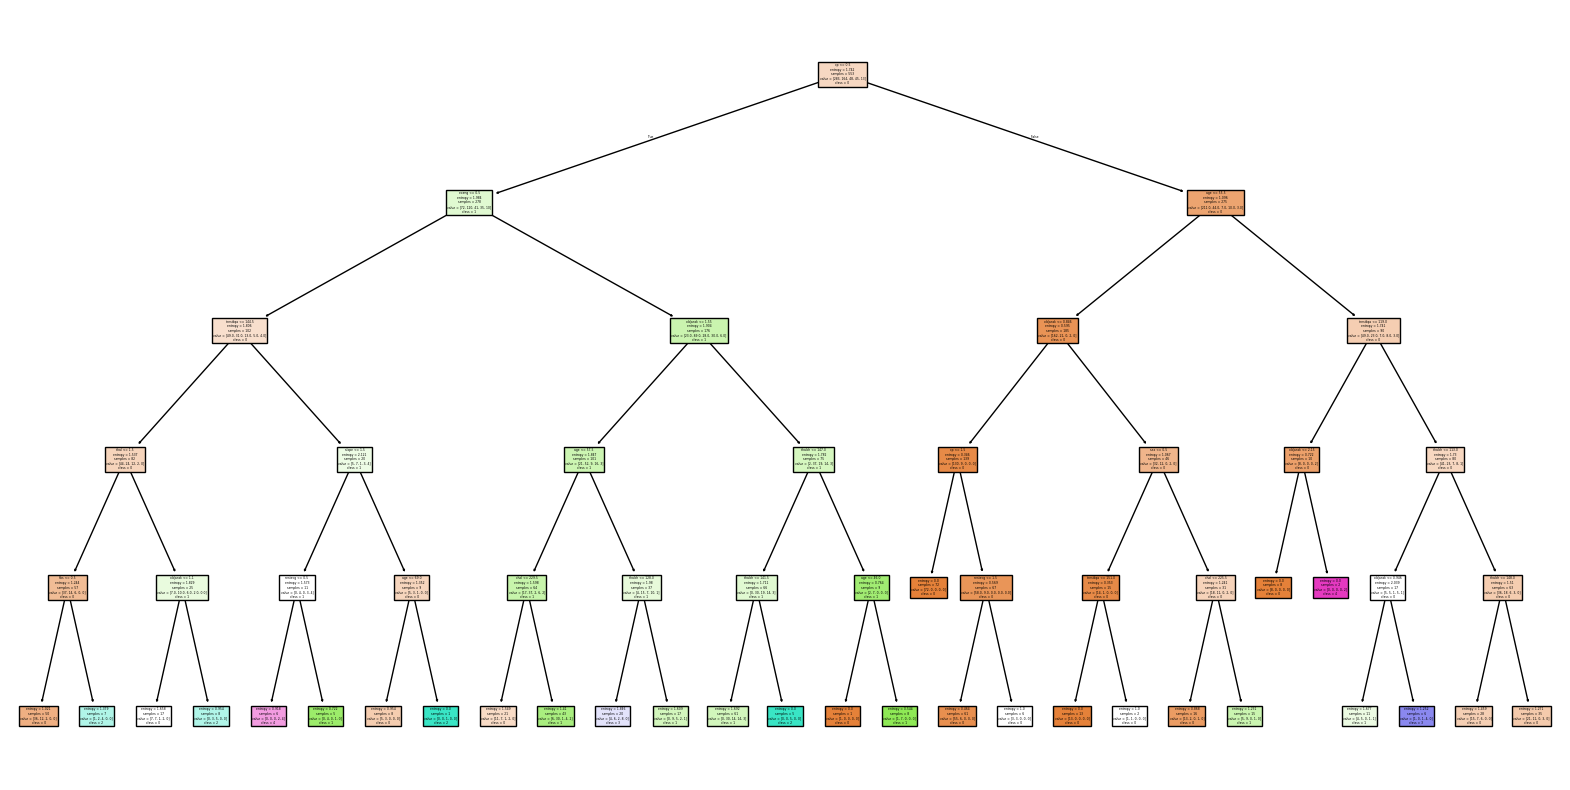

In [95]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=x.columns, class_names=[str(c) for c in best_model.classes_])
plt.show()

In [93]:
feature_importances = best_model.feature_importances_
feature_names = x.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df

,Feature,Importance
2,cp,0.297280
9,oldpeak,0.132344
0,age,0.130163
7,thalch,0.125761
8,exang,0.079614
3,trestbps,0.074203
4,chol,0.037536
10,slope,0.031967
6,restecg,0.029663
5,fbs,0.025173


**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

**Common Decision Tree Hyperparameters:**

* **max\_depth** → Maximum depth of tree. (Prevents overfitting if kept small)
* **min\_samples\_split** → Minimum samples to split a node. (Higher → simpler tree)
* **min\_samples\_leaf** → Minimum samples in a leaf. (Higher → smoother predictions)
* **max\_features** → Number of features to consider at each split. (Adds randomness, reduces overfitting)
* **criterion** → Metric for split (e.g., gini, entropy).




2.What is the difference btwn the label encoding and One-Hot Encoding?

**Label Encoding** → assigns each category a number (e.g., Red=0, Green=1, Blue=2). Best for **ordered data**.

**One-Hot Encoding** → creates separate columns with 0/1 for each category (e.g., Red=\[1,0,0], Green=\[0,1,0], Blue=\[0,0,1]). Best for **unordered data**.
